<a href="https://colab.research.google.com/github/PoChihKuo/2019_aarhus_critical_data/blob/master/hw4_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Load-Data**

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip "HW4_data/public/train_{i}.jpg"

In [ ]:
X_train = []
for i in range(10000):
    X_train.append(np.asarray(Image.open("drive/MyDrive/ML/hw4/HW4_data/public/train_{i}.jpg".format(i=i))))
    
df_train = pd.read_csv("drive/MyDrive/ML/hw4/HW4_data/public/train_label.csv", index_col=0)

In [ ]:
X_val = []
for i in range(1000):
    X_val.append(np.asarray(Image.open("drive/MyDrive/ML/hw4/HW4_data/public/val_{i}.jpg".format(i=i))))
    
df_val = pd.read_csv("drive/MyDrive/ML/hw4/HW4_data/public/val_label.csv", index_col=0)

In [ ]:
X_test = []
for i in range(1500):
    X_test.append(np.asarray(Image.open("drive/MyDrive/ML/hw4/HW4_data/private/test_{i}.jpg".format(i=i))))

df_test_demo = pd.read_csv("drive/MyDrive/ML/hw4/HW4_data/private/test_demo.csv", index_col=0)

##**Data-Preprocessing**

In [ ]:
import pandas as pd
import cv2
import numpy as np

df_train = pd.read_csv('HW4_data/public/train_label.csv')
train_image = []

for i in range(10000): 
    img_path = "HW4_data/public/train_" + str(i) + ".jpg"
    img_cv2 = cv2.imread(img_path)
    image = cv2.resize(img_cv2, dsize=(128, 128), interpolation=cv2.INTER_AREA)
    img  = image/255
    train_image.append(img)

X_train = np.array(train_image)
np.save('train', X_train)
# print(X.shape)
# print(X)

df_val = pd.read_csv('HW4_data/public/val_label.csv')
val_image = []

for i in range(1000): 
    img_path = "HW4_data/public/val_" + str(i) + ".jpg"
    img_cv2 = cv2.imread(img_path)
    image = cv2.resize(img_cv2, dsize=(128, 128), interpolation=cv2.INTER_AREA)
    img  = image/255
    val_image.append(img)

X_val = np.array(val_image)
np.save('val', X_val)

df_test = pd.read_csv('HW4_data/private/test_demo.csv')
test_image = []

for i in range(1500): 
    img_path = "HW4_data/private/test_" + str(i) + ".jpg"
    img_cv2 = cv2.imread(img_path)
    image = cv2.resize(img_cv2, dsize=(128, 128), interpolation=cv2.INTER_AREA)
    img  = image/255
    test_image.append(img)

X_test = np.array(test_image)
np.save('test', X_test)



##**Load-Data-2**

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
X_Train = np.load('drive/MyDrive/ML/hw4/train.npy')
X_Val = np.load('drive/MyDrive/ML/hw4/val.npy')
X_Test = np.load('drive/MyDrive/ML/hw4/test.npy')

df_train = pd.read_csv("drive/MyDrive/ML/hw4/HW4_data/public/train_label.csv", index_col=0)
df_val = pd.read_csv("drive/MyDrive/ML/hw4/HW4_data/public/val_label.csv", index_col=0)
df_test_demo = pd.read_csv("drive/MyDrive/ML/hw4/HW4_data/private/test_demo.csv", index_col=0)


In [ ]:
# X_train = np.array(X_Train[0])
# print(X_train)
# X_val = np.array(X_Val[0])
# print(X_val)
# X_test = np.array(X_Test[0])
# print(X_test)

X_train = X_Train.reshape(X_Train.shape[0], 128, 128, 3)
# print(X_train)
X_val = X_Val.reshape(X_Val.shape[0], 128, 128, 3)
# print(X_val)
X_test = X_Test.reshape(X_Test.shape[0], 128, 128, 3)
# print(X_test)

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Concatenate, concatenate
from sklearn.metrics import f1_score, roc_curve, RocCurveDisplay, auc

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.7.0


##**Basic-prediction(50%)**

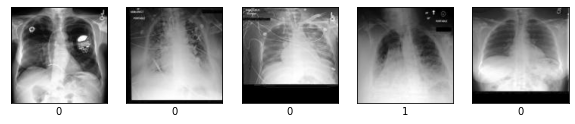

In [ ]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(128, 128, 3), cmap=plt.cm.binary)
    plt.xlabel(df_train['Edema'][i])

In [ ]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
# 64 convolution filters used each of size 3x3

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(64, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(10, activation='softmax'))

In [ ]:
# model.compile(optimizer='Adam', 
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [ ]:
history = model.fit(X_train, df_train['Edema'], epochs=5)

Epoch 1/5
313/313 [==============================] - 56s 91ms/step - loss: 0.5279 - accuracy: 0.7402
Epoch 2/5
313/313 [==============================] - 28s 88ms/step - loss: 0.4379 - accuracy: 0.7918
Epoch 3/5
313/313 [==============================] - 28s 89ms/step - loss: 0.4180 - accuracy: 0.8100
Epoch 4/5
313/313 [==============================] - 28s 88ms/step - loss: 0.3936 - accuracy: 0.8216
Epoch 5/5
313/313 [==============================] - 28s 88ms/step - loss: 0.3835 - accuracy: 0.8257


In [ ]:
print(X_val.shape)
val_loss, val_acc = model.evaluate(X_val, df_val['Edema'])
print('Test accuracy:', val_acc)

Y_basic_val = model.predict(X_val)
Y_basic_val = pd.DataFrame(Y_basic_val, columns = ['Edema'])

fpr_basic, tpr_basic, thresholds_basic =roc_curve(np.array(df_val['Edema']), Y_basic_val['Edema'])
roc_auc_basic = auc(fpr_basic, tpr_basic)
youden_basic = np.argmax(tpr_basic - fpr_basic)
threshold_basic = thresholds_basic[youden_basic] 
print(roc_auc_basic, threshold_basic)

Y_basic_val['Edema'][Y_basic_val['Edema'] >= threshold_basic] = 1
Y_basic_val['Edema'][Y_basic_val['Edema'] < threshold_basic] = 0
Y_basic_val = Y_basic_val.astype(int)
f1_score(np.array(df_val['Edema']), Y_basic_val)

(1000, 128, 128, 3)
32/32 [==============================] - 1s 36ms/step - loss: 0.3674 - accuracy: 0.8380
Test accuracy: 0.8379999995231628
0.8995782216163892 0.30403015


0.7262569832402234

In [ ]:
print(X_test.shape)
Y_basic_output = model.predict(X_test)
print('Basic output:', Y_basic_output)

output_path = 'drive/MyDrive/ML/hw4/107062317_basic_prediction.csv'
# test_pred = pd.DataFrame()
basic_test_pred = pd.DataFrame(Y_basic_output, columns = ['Edema'])
basic_test_pred['Edema'][basic_test_pred['Edema'] >= threshold_basic] = 1
basic_test_pred['Edema'][basic_test_pred['Edema'] < threshold_basic] = 0
basic_test_pred = basic_test_pred.astype(int)
basic_test_pred.to_csv(output_path, index = True)

(1500, 128, 128, 3)
Basic output: [[0.1614229 ]
 [0.29702085]
 [0.02128797]
 ...
 [0.2291382 ]
 [0.1055114 ]
 [0.5798513 ]]


##**Bnous-prediction(10%)**

In [ ]:
# define three sets of inputs
input_image = Input(shape=(128, 128, 3))
input_age = Input(shape=(1,))
input_gender = Input(shape=(1,))
# the first branch operates on the first input
x_2 = Dense(32, activation="relu")(input_age)
x_2 = Dense(8, activation="relu")(input_age)
x_2 = Model(inputs=input_age, outputs=x_2)

# the second branch opreates on the second input
x_3 = Dense(32, activation="relu")(input_gender)
x_3 = Dense(8, activation="relu")(input_gender)
x_3 = Model(inputs=input_gender, outputs=x_3)

# the third branch opreates on the third input
x = Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3))(input_image)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(8, activation='relu')(x)
x = Model(inputs=input_image, outputs=x)
# combine the output of the three branches
combined = Concatenate(axis=1)([x.output, x_2.output, x_3.output])
# apply a FC layer and then a regression prediction on the combined outputs
z = Flatten()(combined)
z = Dense(4, activation='relu')(z)
z = Dropout(0.5)(z)
z = Dense(1, activation='sigmoid')(z)
# our model will accept the inputs of the three branches and
# then output a single value
model_1 = Model(inputs=[x.input, x_2.input, x_3.input], outputs=z)

In [ ]:
model_1.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model_1.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 124, 124, 64  18496       ['conv2d[0][0]']                 
                                )                                                           

In [ ]:
history_1 = model_1.fit([X_train, np.array(df_train['Age']), np.array(df_train['Gender'])], np.array(df_train['Edema']), epochs=5)

Epoch 1/5
313/313 [==============================] - 57s 91ms/step - loss: 0.6367 - accuracy: 0.7038
Epoch 2/5
313/313 [==============================] - 28s 88ms/step - loss: 0.5767 - accuracy: 0.7081
Epoch 3/5
313/313 [==============================] - 28s 88ms/step - loss: 0.5148 - accuracy: 0.7368
Epoch 4/5
313/313 [==============================] - 28s 89ms/step - loss: 0.4928 - accuracy: 0.7535
Epoch 5/5
313/313 [==============================] - 28s 89ms/step - loss: 0.4831 - accuracy: 0.7603


In [ ]:
print(X_val.shape)
val_loss, val_acc = model_1.evaluate([X_val, np.array(df_val['Age']), np.array(df_val['Gender'])], df_val['Edema'])
print('Test accuracy:', val_acc)

Y_bonus_val = model_1.predict([X_val, np.array(df_val['Age']), np.array(df_val['Gender'])])
Y_bonus_val = pd.DataFrame(Y_bonus_val, columns = ['Edema'])

fpr_bonus, tpr_bonus, thresholds_bonus =roc_curve(np.array(df_val['Edema']), Y_bonus_val['Edema'])
roc_auc_bonus = auc(fpr_bonus, tpr_bonus)
youden_bonus = np.argmax(tpr_bonus - fpr_bonus)
threshold_bonus = thresholds_bonus[youden_bonus] 
print(roc_auc_bonus, threshold_bonus)


Y_bonus_val['Edema'][Y_bonus_val['Edema'] >= threshold_bonus] = 1
Y_bonus_val['Edema'][Y_bonus_val['Edema'] < threshold_bonus] = 0
Y_bonus_val = Y_bonus_val.astype(int)
f1_score(np.array(df_val['Edema']), Y_bonus_val)

(1000, 128, 128, 3)
32/32 [==============================] - 2s 39ms/step - loss: 0.3871 - accuracy: 0.8290
Test accuracy: 0.8289999961853027
0.8971976925660324 0.30718267


0.7334315169366715

In [ ]:
print(X_test.shape)
Y_bonus_output = model_1.predict([X_test, np.array(df_test_demo['Age']), np.array(df_test_demo['Gender'])])
print('Basic output:', Y_bonus_output)

output_path = 'drive/MyDrive/ML/hw4/107062317_bonus_prediction.csv'
# test_pred = pd.DataFrame()
bonus_test_pred = pd.DataFrame(Y_bonus_output, columns = ['Edema'])
bonus_test_pred['Edema'][bonus_test_pred['Edema'] >= threshold_bonus] = 1
bonus_test_pred['Edema'][bonus_test_pred['Edema'] < threshold_bonus] = 0
bonus_test_pred = bonus_test_pred.astype(int)
bonus_test_pred.to_csv(output_path, index = True)

(1500, 128, 128, 3)
Basic output: [[0.10120317]
 [0.25165033]
 [0.06844784]
 ...
 [0.149106  ]
 [0.1290708 ]
 [0.46158326]]


##**Advanced-prediction(35%)**

In [ ]:
model_2 = keras.Sequential()
model_2.add(Conv2D(32, kernel_size=(7, 7), activation='relu', input_shape=(128, 128, 3)))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
# model_2.add(Conv2D(128, (3, 3), activation='relu'))
# model_2.add(MaxPooling2D(pool_size=(2, 2)))
# model_2.add(Dropout(0.25))
model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(256, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(7, activation='sigmoid'))


In [ ]:
from tensorflow.keras.optimizers import SGD
# model.compile(optimizer='Adam', 
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model_2.compile(optimizer=sgd,
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

model_2.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 122, 122, 32)      4736      
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 128)      0         
 2D)                                                    

In [ ]:
df_Train = df_train.copy()
df_Train = df_Train.drop(['Age'], axis=1)
df_Train = df_Train.drop(['Gender'], axis=1)
df_Train = np.array(df_Train)

history_2 = model_2.fit(X_train, df_Train, epochs=5, verbose=1)

Epoch 1/5
313/313 [==============================] - 59s 105ms/step - loss: 0.4136 - accuracy: 0.6848
Epoch 2/5
313/313 [==============================] - 32s 103ms/step - loss: 0.3498 - accuracy: 0.7007
Epoch 3/5
313/313 [==============================] - 32s 104ms/step - loss: 0.3400 - accuracy: 0.7056
Epoch 4/5
313/313 [==============================] - 32s 103ms/step - loss: 0.3280 - accuracy: 0.7128
Epoch 5/5
313/313 [==============================] - 32s 102ms/step - loss: 0.3240 - accuracy: 0.7093


In [ ]:
print(X_val.shape)
df_Val = df_val.copy()
df_Val = df_Val.drop(['Age'], axis=1)
df_Val = df_Val.drop(['Gender'], axis=1)


Y_advanced_val = model_2.predict(X_val)
Y_advanced_val = pd.DataFrame(Y_advanced_val, columns = ['Atelectasis', 'Cardiomegaly', 'Edema', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Support Devices'])


fpr_1, tpr_1, thresholds_1 =roc_curve(np.array(df_Val['Atelectasis']), Y_advanced_val['Atelectasis'])
roc_auc_1 = auc(fpr_1, tpr_1)
youden_1 = np.argmax(tpr_1 - fpr_1)
threshold_1 = thresholds_1[youden_1] 
print(roc_auc_1, threshold_1)
fpr_2, tpr_2, thresholds_2 =roc_curve(np.array(df_Val['Cardiomegaly']), Y_advanced_val['Cardiomegaly'])
roc_auc_2 = auc(fpr_2, tpr_2)
youden_2 = np.argmax(tpr_2 - fpr_2)
threshold_2 = thresholds_2[youden_2] 
print(roc_auc_2, threshold_2)
fpr_3, tpr_3, thresholds_3 =roc_curve(np.array(df_Val['Edema']), Y_advanced_val['Edema'])
roc_auc_3 = auc(fpr_3, tpr_3)
youden_3 = np.argmax(tpr_3 - fpr_3)
threshold_3 = thresholds_3[youden_3] 
print(roc_auc_3, threshold_3)
fpr_4, tpr_4, thresholds_4 =roc_curve(np.array(df_Val['Lung Opacity']), Y_advanced_val['Lung Opacity'])
roc_auc_4 = auc(fpr_4, tpr_4)
youden_4 = np.argmax(tpr_4 - fpr_4)
threshold_4 = thresholds_4[youden_4] 
print(roc_auc_4, threshold_4)
fpr_5, tpr_5, thresholds_5 =roc_curve(np.array(df_Val['No Finding']), Y_advanced_val['No Finding'])
roc_auc_5 = auc(fpr_5, tpr_5)
youden_5 = np.argmax(tpr_5 - fpr_5)
threshold_5 = thresholds_5[youden_5] 
print(roc_auc_5, threshold_5)
fpr_6, tpr_6, thresholds_6 =roc_curve(np.array(df_Val['Pleural Effusion']), Y_advanced_val['Pleural Effusion'])
roc_auc_6 = auc(fpr_6, tpr_6)
youden_6 = np.argmax(tpr_6 - fpr_6)
threshold_6 = thresholds_6[youden_6] 
print(roc_auc_6, threshold_6)
fpr_7, tpr_7, thresholds_7 =roc_curve(np.array(df_Val['Support Devices']), Y_advanced_val['Support Devices'])
roc_auc_7 = auc(fpr_7, tpr_7)
youden_7 = np.argmax(tpr_7 - fpr_7)
threshold_7 = thresholds_7[youden_7] 
print(roc_auc_7, threshold_7)

df_Val = np.array(df_Val)
val_loss_2, val_acc_2 = model_2.evaluate(X_val, df_Val)
print('Test accuracy:', val_acc_2)

Y_advanced_val['Atelectasis'][Y_advanced_val['Atelectasis'] >= threshold_1] = 1
Y_advanced_val['Atelectasis'][Y_advanced_val['Atelectasis'] < threshold_1] = 0
Y_advanced_val['Cardiomegaly'][Y_advanced_val['Cardiomegaly'] >= threshold_2] = 1
Y_advanced_val['Cardiomegaly'][Y_advanced_val['Cardiomegaly'] < threshold_2] = 0
Y_advanced_val['Edema'][Y_advanced_val['Edema'] >= threshold_3] = 1
Y_advanced_val['Edema'][Y_advanced_val['Edema'] < threshold_3] = 0
Y_advanced_val['Lung Opacity'][Y_advanced_val['Lung Opacity'] >= threshold_4] = 1
Y_advanced_val['Lung Opacity'][Y_advanced_val['Lung Opacity'] < threshold_4] = 0
Y_advanced_val['No Finding'][Y_advanced_val['No Finding'] >= threshold_5] = 1
Y_advanced_val['No Finding'][Y_advanced_val['No Finding'] < threshold_5] = 0
Y_advanced_val['Pleural Effusion'][Y_advanced_val['Pleural Effusion'] >= threshold_6] = 1
Y_advanced_val['Pleural Effusion'][Y_advanced_val['Pleural Effusion'] < threshold_6] = 0
Y_advanced_val['Support Devices'][Y_advanced_val['Support Devices'] >= threshold_7] = 1
Y_advanced_val['Support Devices'][Y_advanced_val['Support Devices'] < threshold_7] = 0
Y_advanced_val = Y_advanced_val.astype(int)
f1_score(np.array(df_Val), Y_advanced_val, average='weighted')

(1000, 128, 128, 3)
0.8504958047292144 0.15243402
0.8603804697554697 0.23430866
0.9018599735277267 0.38849962
0.8227023461015133 0.21967505
0.9027539066358482 0.607123
0.879197182224429 0.24376342
0.8006881720430109 0.257582
32/32 [==============================] - 1s 34ms/step - loss: 0.3061 - accuracy: 0.7320
Test accuracy: 0.7319999933242798


0.7127369860492969

In [ ]:
print(X_test.shape)
Y_advanced_output = model_2.predict(X_test)
print('Basic output:', Y_advanced_output)

output_path_2 = 'drive/MyDrive/ML/hw4/107062317_advanced_prediction.csv'
# test_pred = pd.DataFrame()
advanced_test_pred = pd.DataFrame(Y_advanced_output, columns = ['Atelectasis', 'Cardiomegaly', 'Edema', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Support Devices'])
advanced_test_pred['Atelectasis'][advanced_test_pred['Atelectasis'] >= threshold_1] = 1
advanced_test_pred['Atelectasis'][advanced_test_pred['Atelectasis'] < threshold_1] = 0
advanced_test_pred['Cardiomegaly'][advanced_test_pred['Cardiomegaly'] >= threshold_2] = 1
advanced_test_pred['Cardiomegaly'][advanced_test_pred['Cardiomegaly'] < threshold_2] = 0
advanced_test_pred['Edema'][advanced_test_pred['Edema'] >= threshold_3] = 1
advanced_test_pred['Edema'][advanced_test_pred['Edema'] < threshold_3] = 0
advanced_test_pred['Lung Opacity'][advanced_test_pred['Lung Opacity'] >= threshold_4] = 1
advanced_test_pred['Lung Opacity'][advanced_test_pred['Lung Opacity'] < threshold_4] = 0
advanced_test_pred['No Finding'][advanced_test_pred['No Finding'] >= threshold_5] = 1
advanced_test_pred['No Finding'][advanced_test_pred['No Finding'] < threshold_5] = 0
advanced_test_pred['Pleural Effusion'][advanced_test_pred['Pleural Effusion'] >= threshold_6] = 1
advanced_test_pred['Pleural Effusion'][advanced_test_pred['Pleural Effusion'] < threshold_6] = 0
advanced_test_pred['Support Devices'][advanced_test_pred['Support Devices'] >= threshold_7] = 1
advanced_test_pred['Support Devices'][advanced_test_pred['Support Devices'] < threshold_7] = 0
advanced_test_pred = advanced_test_pred.astype(int)
advanced_test_pred.to_csv(output_path_2, index = True)

(1500, 128, 128, 3)
Basic output: [[0.10823049 0.0973262  0.25817513 ... 0.75016904 0.15276067 0.3254125 ]
 [0.06959286 0.13681582 0.32171926 ... 0.6749472  0.14000578 0.17469604]
 [0.01010202 0.02020148 0.06861854 ... 0.9288342  0.03124359 0.11414775]
 ...
 [0.00605336 0.01439194 0.04412903 ... 0.9558532  0.01313325 0.13945949]
 [0.02142385 0.03361841 0.1087842  ... 0.89673316 0.03497319 0.09359274]
 [0.23715037 0.34442878 0.61294633 ... 0.39356676 0.38911933 0.4106613 ]]
